In [2]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from  sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_moons


In [3]:
#Figures inline and set visualization style
%matplotlib inline
sns.set()

In [4]:
#import dataset
data = pd.read_csv('data/population_by_zip_2010.csv')
data.head(20)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622831 entries, 0 to 1622830
Data columns (total 7 columns):
Unnamed: 0     1622831 non-null int64
zipcode        1622831 non-null int64
geo_id         1622831 non-null object
minimum_age    1523474 non-null float64
maximum_age    1457236 non-null float64
gender         1589712 non-null object
population     1622831 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 86.7+ MB
None


In [5]:
# fill all missing data = NULL in gender column
# fill all missing data = 0 in minimum_age and maximum_age column
data['gender']=data['gender'].fillna('Null')
data['minimum_age'] = data['minimum_age'].fillna(0)
data['maximum_age'] = data['maximum_age'].fillna(0)
#data.head(20)
#print(data.info())

In [6]:
# Convert gender, minimum_age, maximum_age to int format
encode = LabelEncoder()
data['gender'] =  encode.fit_transform(data['gender'])
data['minimum_age'] = data['minimum_age'].apply(int)
data['maximum_age'] = data['maximum_age'].apply(int)
#print(data.info())
data.head(800000)

,Unnamed: 0,zipcode,geo_id,minimum_age,maximum_age,gender,population
0,0,99776,8600000US99776,0,0,0,124
1,1,38305,8600000US38305,0,0,0,49808
2,2,37086,8600000US37086,0,0,0,31513
3,3,41667,8600000US41667,0,0,0,720
4,4,67001,8600000US67001,0,0,0,1676
...,...,...,...,...,...,...,...
799995,799995,22610,8600000US22610,35,39,1,54
799996,799996,95821,8600000US95821,35,39,1,1031
799997,799997,68979,8600000US68979,35,39,1,45
799998,799998,40372,8600000US40372,35,39,1,82


In [7]:
#color_list = ['red' if i=='1' else 'green' for i in data.loc[:,'gender']]
#pd.plotting.scatter_matrix(data.loc[:,train.columns != 'gender'],
#                          c = color_list,
#                          figsize = [15,15],
#                          diagonal = 'hist',
#                          alpha = 0.5, 
#                          s = 100,
#                          marker = '*')
#plt.show()

In [8]:
data.describe()

,Unnamed: 0,zipcode,minimum_age,maximum_age,gender,population
count,1.622831e+06,1.622831e+06,1.622831e+06,1.622831e+06,1.622831e+06,1.622831e+06
mean,8.114150e+05,4.966782e+04,3.897959e+01,3.808163e+01,1.469388e+00,5.775914e+02
std,4.684711e+05,2.756362e+04,2.632722e+01,2.617745e+01,5.384045e-01,2.891038e+03
min,0.000000e+00,6.020000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.057075e+05,2.663600e+04,1.800000e+01,1.700000e+01,1.000000e+00,1.300000e+01
50%,8.114150e+05,4.974000e+04,3.500000e+01,3.400000e+01,1.000000e+00,6.000000e+01
75%,1.217122e+06,7.212500e+04,6.200000e+01,6.100000e+01,2.000000e+00,2.770000e+02
max,1.622830e+06,9.992900e+04,8.500000e+01,8.400000e+01,2.000000e+00,1.139160e+05


2    794856
1    794856
0     33119
Name: gender, dtype: int64

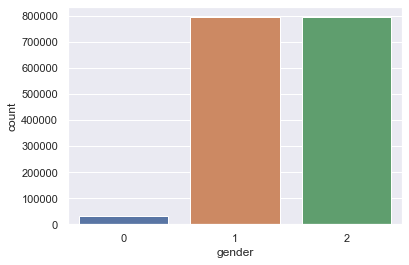

In [9]:
sns.countplot(x = data['gender'], data = data )
data.loc[:,'gender'].value_counts()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2275c150>,
      dtype=object)

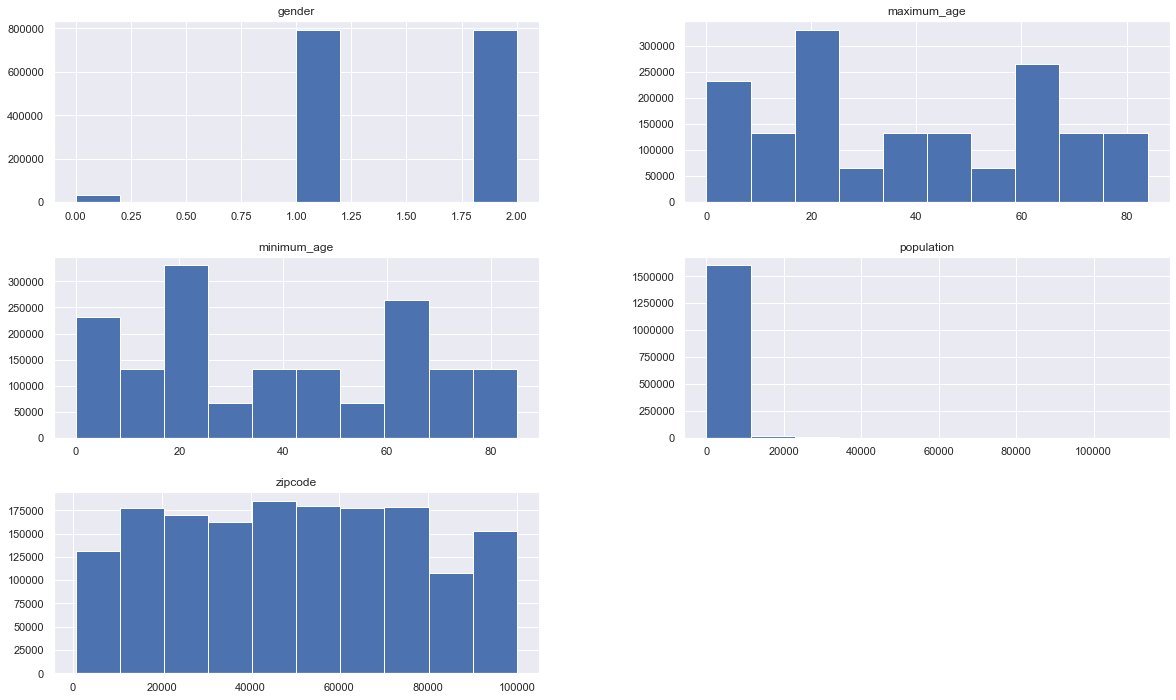

In [10]:
# Visualizations
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 12
data[['zipcode', 'minimum_age', 'maximum_age', 'gender', 'population']].hist()

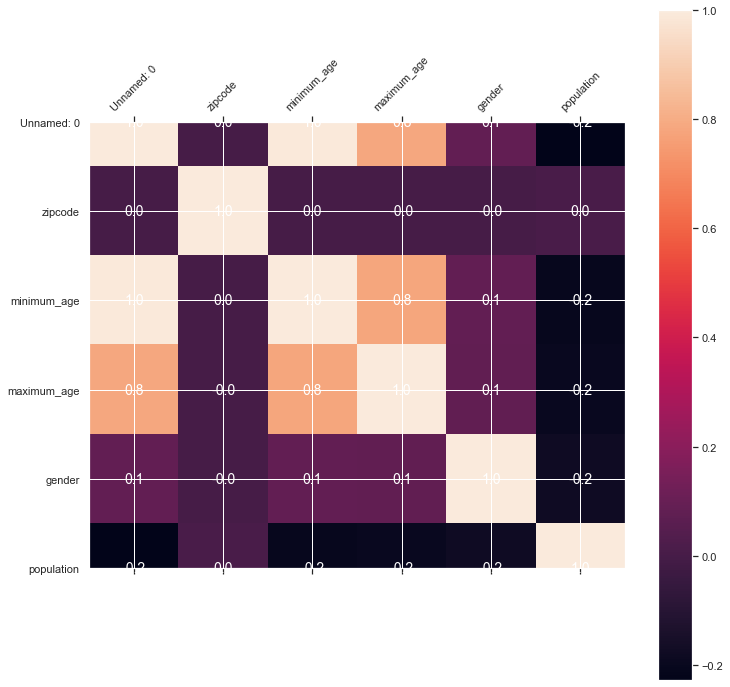

In [11]:
plt.matshow(data.corr())
plt.colorbar()
plt.xticks(np.arange(len(data.corr().columns)), data.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(data.corr().columns)), data.corr().columns.values) 
for (i, j), corr in np.ndenumerate(data.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [12]:
#data = data.loc[1:10000,'zipcode':'population']
data_knn = data[['zipcode','maximum_age','population','minimum_age','gender']]
data_knn.head(80000)

,zipcode,maximum_age,population,minimum_age,gender
0,99776,0,124,0,0
1,38305,0,49808,0,0
2,37086,0,31513,0,0
3,41667,0,720,0,0
4,67001,0,1676,0,0
...,...,...,...,...,...
79995,57339,0,784,0,1
79996,50223,0,222,0,1
79997,7046,0,2097,0,1
79998,31405,0,18879,0,1


In [60]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 2)
x,y = data_knn.loc[:,data_knn.columns != 'gender'], data_knn.loc[:,'gender']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('Prediction : {}'.format(prediction))
print('With KNN (K=2) accuracy is: ', knn.score(x_test,y_test))

Prediction : [1 1 2 ... 1 1 1]
With KNN (K=3) accuracy is:  0.4150785662935196


In [40]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 15)
x,y = data_knn.loc[:,data_knn.columns != 'gender'], data_knn.loc[:,'gender']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('Prediction : {}'.format(prediction))
print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test))

Prediction : [1 2 1 ... 2 1 1]
With KNN (K=3) accuracy is:  0.4310958200677827


In [41]:

# Find the best K number and Accuracy
#neig = np.arange(1,30)
#train_accuracy = []
#test_accuracy = []
#for i, k in enumerate (neig):
#    knn = KNeighborsClassifier(n_neighbors = k)
#    knn.fit(x_train,y_train)
#    train_accuracy.append(knn.score(x_train,y_train))
#    test_accuracy.append(knn.score(x_test,y_test))

# Plot DRAW A GRAPHIC
#plt.figure(figsize=(13,8))
#plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
#plt.plot(neig, train_accuracy, label = 'Training Accuracy')
#plt.legend()
#plt.title('-value vs. Accuracy')
#plt.xlabel('Number of Neighbors')
#plt.ylabel('Accuracy')
#plt.xticks(neig)
#plt.savefig('graph.png')
#plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Best Accuracy is 0.46993119030502206 with K = 2


In [13]:
#split data to train and test data.

train, test = train_test_split(data, test_size = 0.3)
test = test.drop('gender',1)

#train.to_csv('data/train_project.csv', index = False)
#test.to_csv('data/test_project.csv', index = False)

In [14]:
#train1 = pd.read_csv('data/train_project.csv')
#test1 = pd.read_csv('data/test_project.csv')

print(train.info())
print('***************************************************************')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135981 entries, 107817 to 654399
Data columns (total 7 columns):
Unnamed: 0     1135981 non-null int64
zipcode        1135981 non-null int64
geo_id         1135981 non-null object
minimum_age    1135981 non-null int64
maximum_age    1135981 non-null int64
gender         1135981 non-null int64
population     1135981 non-null int64
dtypes: int64(6), object(1)
memory usage: 69.3+ MB
None
***************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 486850 entries, 716241 to 947940
Data columns (total 6 columns):
Unnamed: 0     486850 non-null int64
zipcode        486850 non-null int64
geo_id         486850 non-null object
minimum_age    486850 non-null int64
maximum_age    486850 non-null int64
population     486850 non-null int64
dtypes: int64(5), object(1)
memory usage: 26.0+ MB
None


In [15]:
#DRAW A GRAPHIC
#plt.figure(figsize=(16,8))
#sns.distplot(train['zipcode'])
#plt.show()

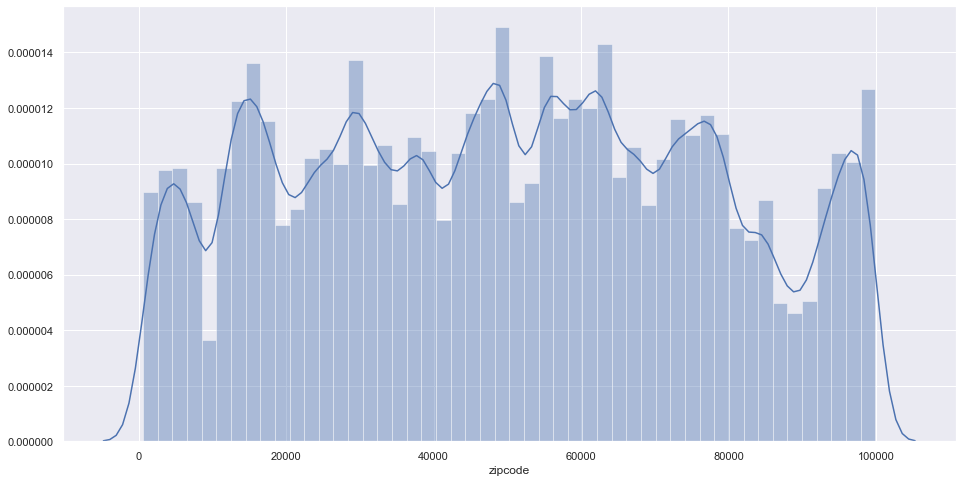

In [16]:
#DRAW A GRAPHIC
plt.figure(figsize=(16,8))
sns.distplot(train['zipcode'])
plt.show()

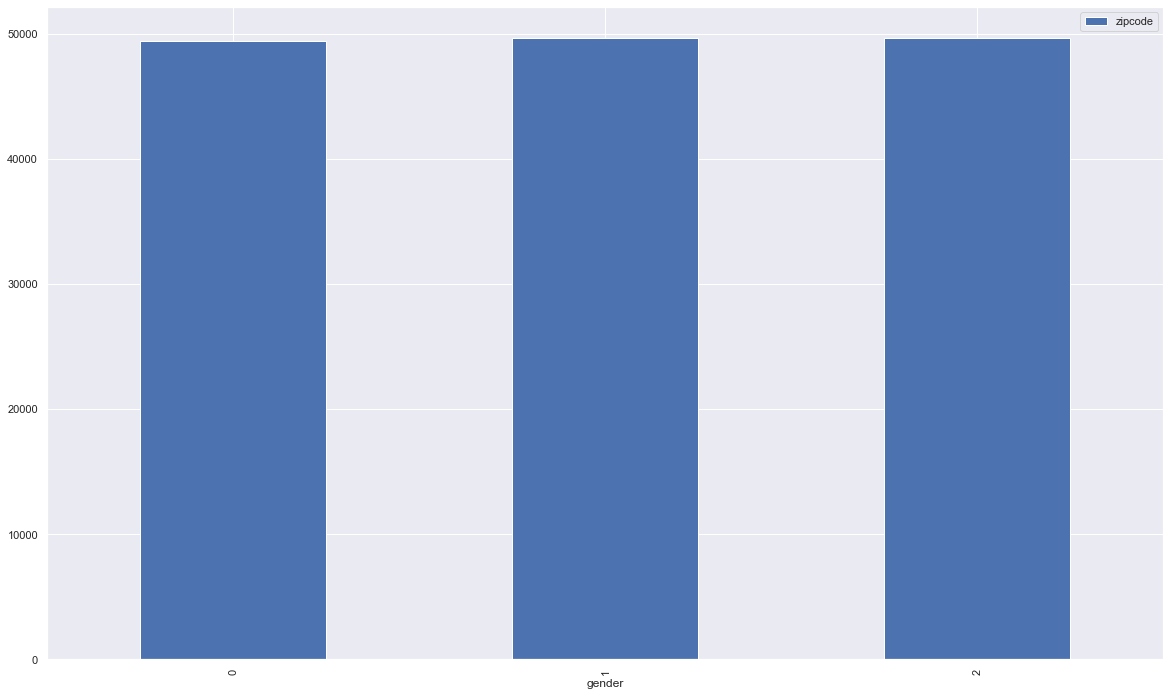

In [17]:
#plt.hist(x='zipcode', data=train)
sex_pivot = train.pivot_table(index="gender",values="zipcode")
sex_pivot

#DRAW A GRAPHIC
sex_pivot.plot.bar()
plt.show()

In [98]:
agg_df = train.groupby('zipcode').sum()

agg_df.sort_values('zipcode', ascending = 0)

,Unnamed: 0,minimum_age,maximum_age,gender,population
zipcode,,,,,
99929,27651671,1308,1322,55,6539
99927,27108038,1330,1228,47,147
99926,30691852,1467,1394,54,4029
99925,29680730,1395,1397,50,2225
99923,30501638,1457,1374,53,236
...,...,...,...,...,...
612,32632019,1610,1538,55,118051
610,24033537,1174,1165,41,61099
606,26118187,1294,1286,48,17149


In [102]:
zipcode1 = train.groupby('zipcode').get_group(602)
zipcode2 = train.groupby('zipcode').get_group(603)
zipcode3 = train.groupby('zipcode').get_group(606)
zipcode4 = train.groupby('zipcode').get_group(610)
df_6 = pd.concat([zipcode1,zipcode2,zipcode3,zipcode4])
df_6.head()

,Unnamed: 0,zipcode,geo_id,minimum_age,maximum_age,gender,population
23276,23276,602,8600000US00602,0,0,0,41520
170520,170520,602,8600000US00602,5,9,2,1271
1320428,1320428,602,8600000US00602,67,69,1,527
1563070,1563070,602,8600000US00602,85,0,2,187
194467,194467,602,8600000US00602,5,9,1,1217


In [18]:
# Gaussian Naive Bayes model
x = train[['zipcode','population','minimum_age','maximum_age']]
y = train['gender']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3 )

# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy: 0.49073783359497647


In [81]:
#plt.hist(x='zipcode', data=train)
sex_pivot = train.pivot_table(index="gender",values="zipcode")
sex_pivot

#DRAW A GRAPHIC
#sex_pivot.plot.bar()
#plt.show()

,zipcode
gender,
0,16563.356762
1,16564.124296
2,16551.620704


In [82]:
#DRAW A GRAPHIC
#plt.figure(figsize=(16,8))
#sns.boxplot(x='zipcode', y='gender_1', data=train)

In [83]:
train[['zipcode','gender']].groupby(['zipcode'],as_index=False).agg(['mean','count','sum'])

gender          
             mean count sum
zipcode                    
0        1.363636    33  45
1        1.500000    34  51
2        1.517241    29  44
3        1.416667    36  51
4        1.406250    32  45
...           ...   ...  ..
33114    1.457143    35  51
33115    1.421053    38  54
33116    1.425000    40  57
33117    1.514286    35  53
33118    1.437500    32  46

[33119 rows x 3 columns]

In [48]:
# RandomForest Classifier
x = train[['zipcode','population','minimum_age','maximum_age']]
y = train['gender']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3 )


In [49]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Accuracy on training set: 0.983
Accuracy on test set: 0.454


In [50]:
#import mglearn #helper library
#fig, axes = plt.subplots(2, 3, figsize=(20, 10))
#for i, (ax, tree) in enumerate(zip(axes.ravel(), rf.estimators_)):
#    ax.set_title("Tree {}".format(i))
#    mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax=ax)
    
#mglearn.plots.plot_2d_separator(rf, x_train, fill=True, ax=axes[-1, -1], alpha=.4)
#axes[-1, -1].set_title("Random Forest")
#mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)

In [51]:
# RandomForest Classifier - 2nd "tweaks" different parameter values

#rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
#rf.fit(x_train, y_train)

In [52]:
# Accuracy for 2nd tweaks - different parameter values
#print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
#print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

In [53]:
rf_prediction = rf.predict(x_test)
test_pred = rf.predict(test[['zipcode','population','minimum_age','maximum_age']])
test_pred = pd.DataFrame(test_pred, columns = ['gender'])
df = pd.concat([test, test_pred], axis = 1)


In [54]:
test_pred.head(50)

,gender
0,2
1,1
2,2
3,2
4,1
5,1
6,1
7,1
8,1
9,1


In [55]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))

MSE: 0.5799850349917106


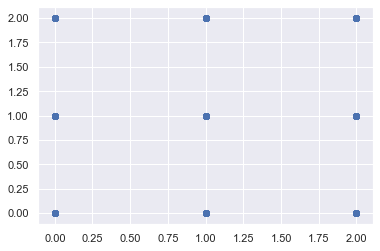

In [57]:
plt.scatter(y_test,rf_prediction)

In [59]:
df = df[['zipcode', 'gender']]
df.head(5000)

,zipcode,gender
0,33080.0,2.0
1,NaN,1.0
2,NaN,2.0
3,NaN,2.0
4,NaN,1.0
...,...,...
4995,NaN,2.0
4996,27294.0,2.0
4997,16266.0,1.0
4998,NaN,1.0


In [ ]:
#Draw a Graphic
#plt.figure(figsize=(12, 7))
#bplot = sns.boxplot(x='gender',y='zipcode',data=df, width = 0.5, palette="colorblind")